# Example mascaret

## Geometry file

In [1]:
import os.path
from data_manip.formats.mascaretgeo_file import MascaretGeoFile

# File with a single reach
mascgeo_file = MascaretGeoFile(os.path.join(os.environ['HOMETEL'],
                                            'examples', 'mascaret', 'Test6', 'geometrie'),
                               'geo')
print(mascgeo_file.summary())

# File with multiples reaches
mascgeo_file = MascaretGeoFile(os.path.join(os.environ['HOMETEL'],
                                            'examples', 'mascaret', 'Test15', 'mascaret0.geo'))
print(mascgeo_file.summary())

~> MascaretGeoFile: /Users/fabrice/Codes/Telemac/trunk/examples/mascaret/Test6/geometrie
    - Reach #1 (Bief_1) with 30 sections
        1) Section #1 (prof1_1) at pk 0.000000
        2) Section #2 (prof1_2) at pk 50.000000
        3) Section #3 (prof1_3) at pk 100.000000
        4) Section #4 (prof1_4) at pk 150.000000
        5) Section #5 (prof1_5) at pk 200.000000
        6) Section #6 (prof1_6) at pk 250.000000
        7) Section #7 (prof1_7) at pk 300.000000
        8) Section #8 (prof1_8) at pk 350.000000
        9) Section #9 (prof1_9) at pk 400.000000
        10) Section #10 (prof1_10) at pk 425.000000
        11) Section #11 (prof1_11) at pk 435.000000
        12) Section #12 (prof1_12) at pk 450.000000
        13) Section #13 (prof1_13) at pk 470.000000
        14) Section #14 (prof1_14) at pk 475.000000
        15) Section #15 (prof1_15) at pk 500.000000
        16) Section #16 (prof1_16) at pk 505.000000
        17) Section #17 (prof1_17) at pk 530.000000
        18) Sect

## Opthyca result file

Run some validation mascaret test cases such as `Test18` and `Test26` to have generate opt files ( respectively `sarap_ecr.opt` and `rezo_ecr.opt`).

In [2]:
%%bash
# Run Test18 : ressaut
cd $HOMETEL/examples/mascaret/Test18 && mascaret.py sarap.xcas



Loading Options and Configurations
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  _                        _    
 | |                      | |   
 | |_  _ __  _   _  _ __  | | __
 | __|| '__|| | | || '_ \ | |/ /
 | |_ | |   | |_| || | | ||   < 
  \__||_|    \__,_||_| |_||_|\_\
                                
                                


Running your CAS file(s) for:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

mac.gfortran.dyn: 
    

    +> Gfortran compiler 9.1 with OpenMPI

    +> root:    /Users/fabrice/Codes/Telemac/trunk
    +> module: ad / api / artemis / bief
               damocles  / gaia  / gretel  / hermes
               identify_liq_bnd  / khione  / mascaret  / nestor
               parallel  / partel  / postel3d  / sisyphe
               special  / stbtel  / telemac2d  / telemac3d
               tomawac / waqtel


~~~~~~~~~~~~~~~~~

In [3]:
%%bash
# Run Test26 : confluence
cd $HOMETEL/examples/mascaret/Test26 && mascaret.py rezo.xcas



Loading Options and Configurations
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

  _                        _    
 | |                      | |   
 | |_  _ __  _   _  _ __  | | __
 | __|| '__|| | | || '_ \ | |/ /
 | |_ | |   | |_| || | | ||   < 
  \__||_|    \__,_||_| |_||_|\_\
                                
                                


Running your CAS file(s) for:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

mac.gfortran.dyn: 
    

    +> Gfortran compiler 9.1 with OpenMPI

    +> root:    /Users/fabrice/Codes/Telemac/trunk
    +> module: ad / api / artemis / bief
               damocles  / gaia  / gretel  / hermes
               identify_liq_bnd  / khione  / mascaret  / nestor
               parallel  / partel  / postel3d  / sisyphe
               special  / stbtel  / telemac2d  / telemac3d
               tomawac / waqtel


~~~~~~~~~~~~~~~~~

In [4]:
import os.path
from data_manip.formats.mascaret_file import MascaretFile


masc_file = MascaretFile(os.path.join(os.environ['HOMETEL'], 'examples', 'mascaret', 'Test26', 'rezo_ecr.opt'))
print(masc_file.summary())

~> MascaretFile: /Users/fabrice/Codes/Telemac/trunk/examples/mascaret/Test26/rezo_ecr.opt (mode=r)
    - Reach #1 (Reach_1) with 21 sections
        0) Section #1 (Profil_1) at pk 0.000000
        1) Section #2 (Profil_2) at pk 50.000000
        2) Section #3 (Profil_3) at pk 100.000000
        3) Section #4 (Profil_4) at pk 150.000000
        4) Section #5 (Profil_5) at pk 200.000000
        5) Section #6 (Profil_6) at pk 250.000000
        6) Section #7 (Profil_7) at pk 300.000000
        7) Section #8 (Profil_8) at pk 350.000000
        8) Section #9 (Profil_9) at pk 400.000000
        9) Section #10 (Profil_10) at pk 450.000000
        10) Section #11 (Profil_11) at pk 500.000000
        11) Section #12 (Profil_12) at pk 550.000000
        12) Section #13 (Profil_13) at pk 600.000000
        13) Section #14 (Profil_14) at pk 650.000000
        14) Section #15 (Profil_15) at pk 700.000000
        15) Section #16 (Profil_16) at pk 750.000000
        16) Section #17 (Profil_17) at pk 

In [5]:
# Get reaches
masc_file.reaches

OrderedDict([(1, Reach #1 (Reach_1) with 21 sections),
             (2, Reach #2 (Reach_2) with 21 sections),
             (3, Reach #3 (Reach_3) with 21 sections)])

In [6]:
# Get sections of reach `1`
masc_file.reaches[1].sections

OrderedDict([(1, Section #1 (Profil_1) at pk 0.000000),
             (2, Section #2 (Profil_2) at pk 50.000000),
             (3, Section #3 (Profil_3) at pk 100.000000),
             (4, Section #4 (Profil_4) at pk 150.000000),
             (5, Section #5 (Profil_5) at pk 200.000000),
             (6, Section #6 (Profil_6) at pk 250.000000),
             (7, Section #7 (Profil_7) at pk 300.000000),
             (8, Section #8 (Profil_8) at pk 350.000000),
             (9, Section #9 (Profil_9) at pk 400.000000),
             (10, Section #10 (Profil_10) at pk 450.000000),
             (11, Section #11 (Profil_11) at pk 500.000000),
             (12, Section #12 (Profil_12) at pk 550.000000),
             (13, Section #13 (Profil_13) at pk 600.000000),
             (14, Section #14 (Profil_14) at pk 650.000000),
             (15, Section #15 (Profil_15) at pk 700.000000),
             (16, Section #16 (Profil_16) at pk 750.000000),
             (17, Section #17 (Profil_17) at pk 800.00

In [7]:
# Get section `1` of reach `1`
masc_file.reaches[1].sections[1]

Section #1 (Profil_1) at pk 0.000000

## Longitudinal profile

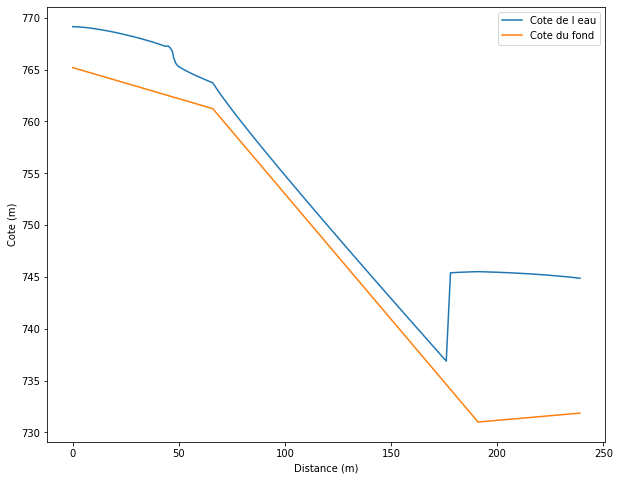

In [8]:
import matplotlib.pyplot as plt
import os.path

from data_manip.formats.mascaret_file import MascaretFile
from postel.plot1d import plot1d


# Selection to display
masc_file = MascaretFile(os.path.join(os.environ['HOMETEL'], 'examples', 'mascaret', 'Test18', 'sarap_ecr.opt'))
varnames = ['Cote de l eau', 'Cote du fond']
reach_id = 1  # first reach
time_index = -1  # last frame
reach = masc_file.reaches[reach_id]

fig, ax = plt.subplots(figsize=(10,8))

for varname in varnames:
    var_pos = masc_file.get_position_var(varname)
    values = masc_file.get_values_at_reach(time_index, reach_id, var_pos)
    plot1d(ax, reach.get_section_pk_list(), values,
           plot_label='%s' % varname,
           x_label='Distance (m)',
           y_label='Cote (m)')

# Displaying legend
ax.legend()

# Showing figure
plt.show()

del plt
del masc_file

## Temporal profile

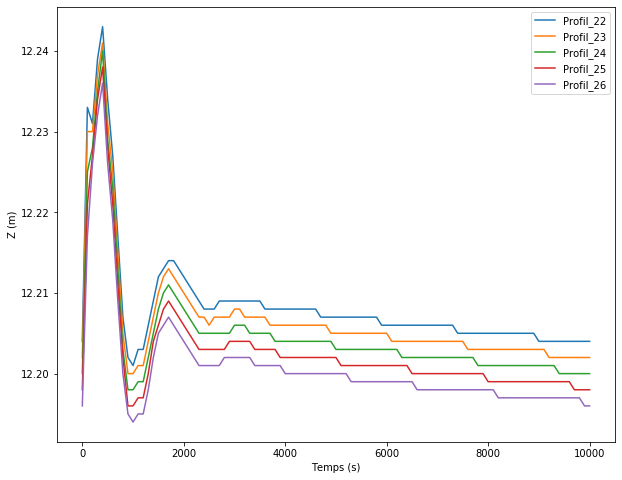

In [9]:
import matplotlib.pyplot as plt
import os.path

from data_manip.formats.mascaret_file import MascaretFile
from postel.plot1d import plot1d


# Selection to display
masc_file = MascaretFile(os.path.join(os.environ['HOMETEL'], 'examples', 'mascaret', 'Test26', 'rezo_ecr.opt'))
varname = 'Cote de l eau'
reach_id = 2  # first reach
reach = masc_file.reaches[reach_id]
sections = reach[:5]  # First 5 sections of requested reach

# Build plot
fig, ax = plt.subplots(figsize=(10, 8))

var_pos = masc_file.get_position_var(varname)
for section in sections:
    values = masc_file.get_series(reach_id, section.id, [var_pos])
    plot1d(ax, masc_file.times, values,
           plot_label='%s' % section.name,
           x_label='Temps (s)',
           y_label='Z (m)')

# Displaying legend
ax.legend()

# Showing figure
plt.show()

del plt
del masc_file

## creation .lig file (LIDOP format)

Write a LIDOP format file for compute reprise

In [10]:
import os.path
from data_manip.formats.mascaret_file import MascaretFile


masc_file = MascaretFile(os.path.join(os.environ['HOMETEL'], 'examples', 'mascaret', 'Test26', 'rezo_ecr.opt'))
# the last time_step for .lig file
id_time = masc_file.ntimestep - 1
# id_time = -1 # give the same result
masc_file.export_as_lig('rezo_ecr.lig', id_time)

Display the .lig file:

In [11]:
%%bash
cat rezo_ecr.lig

RESULTATS CALCUL,DATE : 01/01/1900 00:00
FICHIER RESULTAT MASCARET                                               
----------------------------------------------------------------------- 
 IMAX  = 63   NBBIEF= 3  
 I1,I2 = 1    21   22   42   43   63   
 X
         0.00        50.00       100.00       150.00       200.00
       250.00       300.00       350.00       400.00       450.00
       500.00       550.00       600.00       650.00       700.00
       750.00       800.00       850.00       900.00       950.00
      1000.00      1001.00      1051.00      1101.00      1151.00
      1201.00      1251.00      1301.00      1351.00      1401.00
      1451.00      1501.00      1551.00      1601.00      1651.00
      1701.00      1751.00      1801.00      1851.00      1901.00
      1951.00      2001.00      2002.00      2052.00      2102.00
      2152.00      2202.00      2252.00      2302.00      2352.00
      2402.00      2452.00      2502.00      2552.00      2602.00
      2652.00     

## Creation opthyca file (OPTHYCA format)

This could be interesting if you reduce the variable number or the time step number in the mascaret results file

In [12]:
import os.path
from data_manip.formats.mascaret_file import MascaretFile

path_file = os.path.join(os.environ['HOMETEL'], 'examples', 'mascaret', 'Test26')

masc_file = MascaretFile(os.path.join(path_file, 'rezo_ecr.opt'))

# List of time index 
times_indexes=[0,-1]
# [initialisation time step, last time step]
vars_indexes=[]
# get position with variable name
vars_indexes.append(masc_file.get_position_var("Cote du fond"))
vars_indexes.append(masc_file.get_position_var("Cote de l eau"))
# get position with abbreviation of variable name
vars_indexes.append(masc_file.get_position_var_abbr("Q"))
print('vars_indexes = ',vars_indexes)
print('times_indexes = ',times_indexes)

# Write a new file
masc_file.write_optfile(os.path.join(path_file, 'rezo_ecr_ZQ.opt'), times_indexes, vars_indexes)

del masc_file

vars_indexes =  [0, 1, 9]
times_indexes =  [0, -1]


Check the new file which is created.

In [13]:
# check new file 
masc_file_new = MascaretFile(os.path.join(path_file, 'rezo_ecr_ZQ.opt'))
print(masc_file_new.summary())
del masc_file_new

~> MascaretFile: /Users/fabrice/Codes/Telemac/trunk/examples/mascaret/Test26/rezo_ecr_ZQ.opt (mode=r)
    - Reach #1 (Reach_1) with 21 sections
        0) Section #1 (Profil_1) at pk 0.000000
        1) Section #2 (Profil_2) at pk 50.000000
        2) Section #3 (Profil_3) at pk 100.000000
        3) Section #4 (Profil_4) at pk 150.000000
        4) Section #5 (Profil_5) at pk 200.000000
        5) Section #6 (Profil_6) at pk 250.000000
        6) Section #7 (Profil_7) at pk 300.000000
        7) Section #8 (Profil_8) at pk 350.000000
        8) Section #9 (Profil_9) at pk 400.000000
        9) Section #10 (Profil_10) at pk 450.000000
        10) Section #11 (Profil_11) at pk 500.000000
        11) Section #12 (Profil_12) at pk 550.000000
        12) Section #13 (Profil_13) at pk 600.000000
        13) Section #14 (Profil_14) at pk 650.000000
        14) Section #15 (Profil_15) at pk 700.000000
        15) Section #16 (Profil_16) at pk 750.000000
        16) Section #17 (Profil_17) at 

In [14]:
%%bash
cat $HOMETEL/examples/mascaret/Test26/rezo_ecr_ZQ.opt

[variables]
"Cote du fond";"ZREF";"m";0
"Cote de l eau";"Z";"m";0
"Debit total";"Q";"m3/s";0
[resultats]
0.0;" 1";"    1";0.0;6.0;12.204;400.0 
0.0;" 1";"    2";50.0;6.0;12.202;400.0 
0.0;" 1";"    3";100.0;6.0;12.2;400.0 
0.0;" 1";"    4";150.0;6.0;12.198;400.0 
0.0;" 1";"    5";200.0;6.0;12.196;400.0 
0.0;" 1";"    6";250.0;6.0;12.194;400.0 
0.0;" 1";"    7";300.0;6.0;12.193;400.0 
0.0;" 1";"    8";350.0;6.0;12.191;400.0 
0.0;" 1";"    9";400.0;6.0;12.189;400.0 
0.0;" 1";"   10";450.0;6.0;12.187;400.0 
0.0;" 1";"   11";500.0;6.0;12.185;400.0 
0.0;" 1";"   12";550.0;6.0;12.183;400.0 
0.0;" 1";"   13";600.0;6.0;12.181;400.0 
0.0;" 1";"   14";650.0;6.0;12.179;400.0 
0.0;" 1";"   15";700.0;6.0;12.177;400.0 
0.0;" 1";"   16";750.0;6.0;12.175;400.0 
0.0;" 1";"   17";800.0;6.0;12.174;400.0 
0.0;" 1";"   18";850.0;6.0;12.172;400.0 
0.0;" 1";"   19";900.0;6.0;12.17;400.0 
0.0;" 1";"   20";950.0;6.0;12.168;400.0 
0.0;" 1";"   21";1000.0;6.0;12.166;400.0 
0.0;" 2";"   22";1001.0;6.0;12.204;400.